In [11]:
!wget https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b&e=2&dl=0

--2025-01-10 05:51:41--  https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf7bfcc8b6a30584575eaf76fae.dl.dropboxusercontent.com/cd/0/inline/Ch7TWhpxUMApOFtz-0aXmdpc95qkBvE8aRqn3-jsSlUh8WGD0T9ZYPlg05P2r4mmQqi1rdB0ovNmalWtufUdyxN8fPZX0aWd8q5bs1VPKrvNdxUUWZv-q1CXfnaNPU5JdyBp8Jow3pLl7WCoSLwrrUQB/file# [following]
--2025-01-10 05:51:41--  https://ucf7bfcc8b6a30584575eaf76fae.dl.dropboxusercontent.com/cd/0/inline/Ch7TWhpxUMApOFtz-0aXmdpc95qkBvE8aRqn3-jsSlUh8WGD0T9ZYPlg05P2r4mmQqi1rdB0ovNmalWtufUdyxN8fPZX0aWd8q5bs1VPKrvNdxUUWZv-q1CXfnaNPU5JdyBp8Jow3pLl7WCoSLwrrUQB/file
Resolving ucf7bfcc8b6a30584575eaf76fae.dl.dropboxusercontent.com (ucf7bfcc8b6a30584575eaf76fae.dl.dropboxusercontent.com)... 162.125.1.15, 2620:100:

In [12]:
!unzip dataset.zip?dl=0

Archive:  dataset.zip?dl=0
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of dataset.zip?dl=0 or
        dataset.zip?dl=0.zip, and cannot find dataset.zip?dl=0.ZIP, period.

No zipfiles found.


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.losses import categorical_crossentropy

#  Building our Model To train the data

In [8]:
# Working with pre trained model

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [14]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [16]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/drive/MyDrive/train",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 350 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

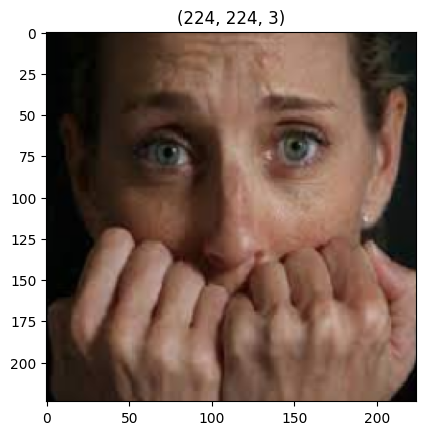

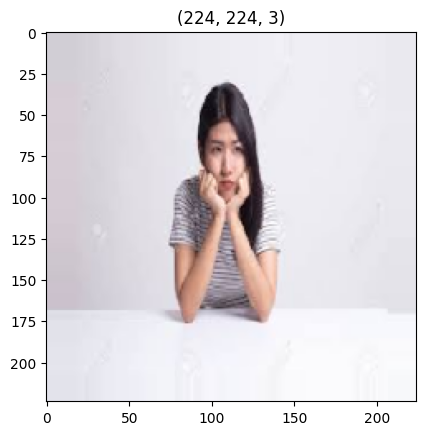

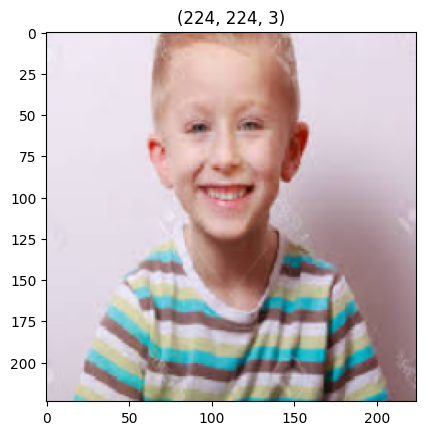

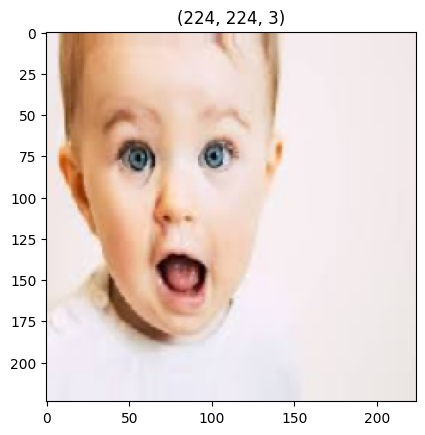

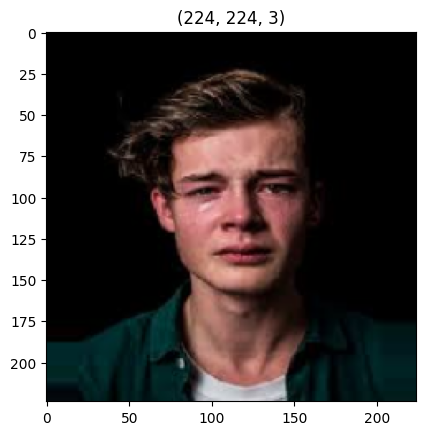

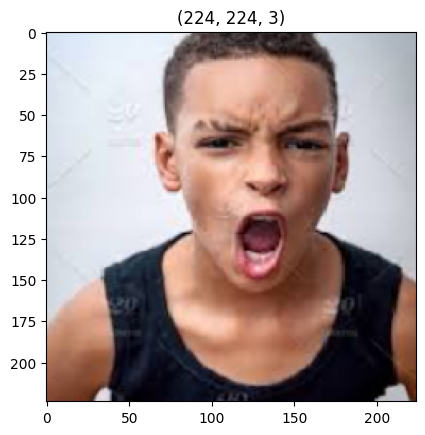

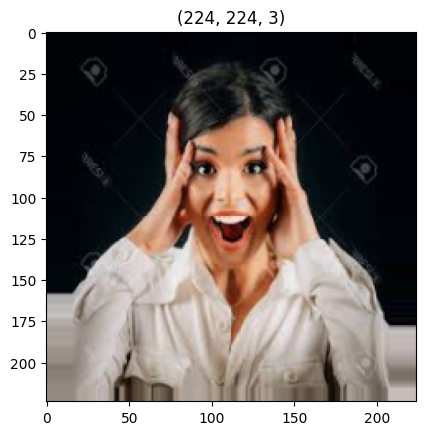

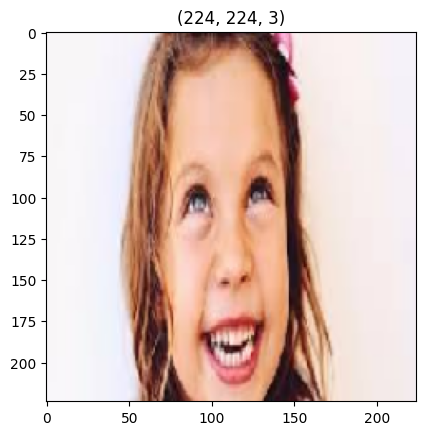

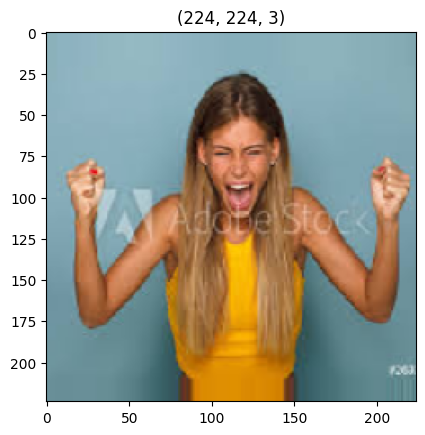

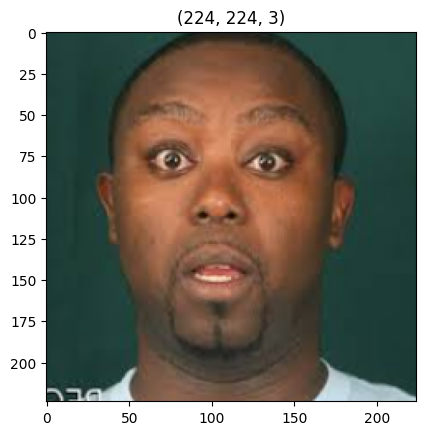

In [18]:
# to visualize the images in the traing data denerator
t_img, label = next(train_data)


#-----------------------------------------------------------------------------
# function when called will prot the images
def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images
plotImages(t_img, label)

# having early stopping and model check point

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode='auto')

# Model checkpoint for saving full model
mc = ModelCheckpoint(filepath="best_model.keras", monitor='val_accuracy', verbose=1,
                      save_best_only=True, mode='auto')  # Use `.keras` extension for full model

# Callbacks list
call_back = [es, mc]


ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=best_model.h5

In [22]:
import tensorflow as tf
print(tf.__version__)


2.17.1


In [27]:
hist = model.fit(
    train_data,
    steps_per_epoch=10,
    epochs=30,
    validation_data=val_data,
    validation_steps=8,
    callbacks=[es, mc]
)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2066 - loss: 11.2779
Epoch 1: val_accuracy improved from -inf to 0.53125, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.2110 - loss: 11.2630 - val_accuracy: 0.5312 - val_loss: 7.0217
Epoch 2/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2812 - loss: 13.8101

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy improved from 0.53125 to 0.61702, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.2812 - loss: 13.8101 - val_accuracy: 0.6170 - val_loss: 5.9532
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.5953 - loss: 5.0402
Epoch 3: val_accuracy improved from 0.61702 to 0.68359, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 307ms/step - accuracy: 0.5975 - loss: 4.9463 - val_accuracy: 0.6836 - val_loss: 2.2471
Epoch 4/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6562 - loss: 2.0652
Epoch 4: val_accuracy did not improve from 0.68359
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.6562 - loss: 2.0652 - val_accuracy: 0.6702 - val_loss: 2.3348
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.6614 - loss: 1.9887
Epoch 5: val_accuracy improved from 0.68359 to 0.84375, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.6670 - loss: 1.96

In [31]:

# Loading the best fit model
from keras.models import load_model
model = load_model("/content/best_model.keras")

In [32]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

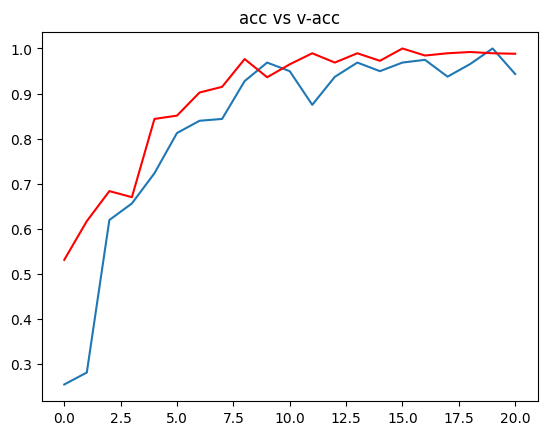

In [33]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

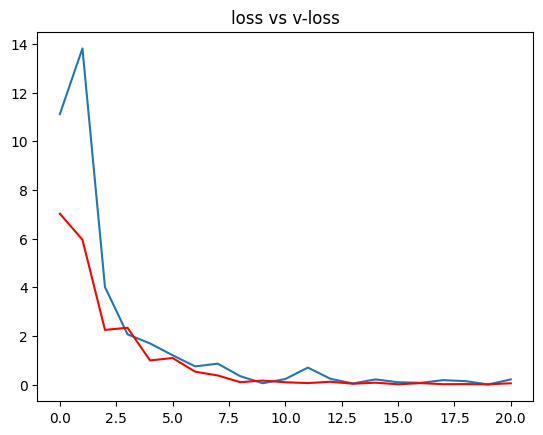

In [34]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [35]:
# just to map o/p values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
 the image is of Neutral


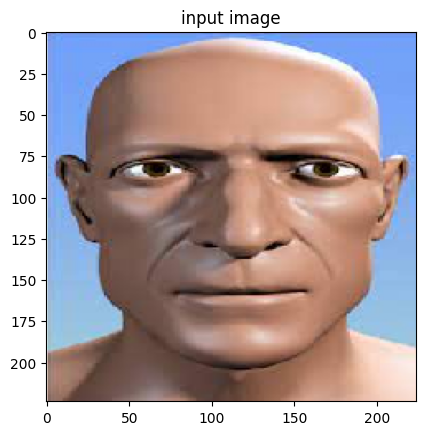

In [38]:
# path for the image to see if it predics correct class

path = "/content/drive/MyDrive/train/Neutral/download.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()